# Proyecto de visualización - corte 2
  > Daniela Alexandra Herrera Fandiño  
  > Jeiber Javier Diaz Espitia

In [ ]:
# Cargue de librerias
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade topojson
!pip install --upgrade plotly

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 41.1 MB/s 
     |████████████████████████████████| 16.7 MB 277 kB/s 
     |████████████████████████████████| 44 kB 1.5 MB/s 
     |████████████████████████████████| 78 kB 3.3 MB/s 
     |████████████████████████████████| 28.8 MB 46.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

### Contexto de los datos
Los datos presentados resultan de la medición de la prevalencia de enfermedades mentales en diferentes países. Las enfermedades contempladas resultan de esquizofrenia, transtorno de bipolaridad, desórdenes de alimentación, desórdenes de ansiedad, depresion y desórden mental causado por el consumo de drogas o alcohol.

Estas mediciones son tomadas anualmente, encontrandose registros desde 1990 hasta el 2017, para un total de 28 años.

### Cargue de la información

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_base = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mental health Depression disorder Data.xlsx',
                       dtype={ 
                     'Year': int      # Año, es un factor pero cae en str?
                 })
df_base

FileNotFoundError: ignored

**Dimensión de los datos**

In [ ]:
print('Total de Filas: ', df_base.shape[0])
print('Total de Columnas: ', df_base.shape[1])

Total de Filas:  6468
Total de Columnas:  10


**Lectura de datos complementarios -> Latitud y longitud**

In [ ]:
geograficas = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Geograficas.xlsx')
geograficas

,País,Latitud,Longitud
0,Afghanistan,33.000000,65.000000
1,Albania,41.333333,19.816667
2,Germany,51.000000,9.000000
3,Andorra,42.500000,1.600000
4,Angola,-12.500000,18.500000
...,...,...,...
264,Southeast Asia,9.458056,120.765833
265,Southern Latin America,-26.148333,-60.899167
266,Sub-Saharan Africa,9.101944,18.281111
267,Sudan,15.000000,30.000000


0) Combinación de los data frames mediante el left.join

In [ ]:
df_mhd = df_base.merge(geograficas, 
                       left_on='Entity', 
                       right_on='País', 
                       how = 'left')
print('Dimension bases unidas: ', df_mhd.shape)
print('Dimension base original: ', df_base.shape)
print('Dimension geograficas: ', geograficas.shape)

Dimension bases unidas:  (6468, 13)
Dimension base original:  (6468, 10)
Dimension geograficas:  (269, 3)


In [ ]:
df_mhd

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),País,Latitud,Longitud
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,Afghanistan,33.0,65.0
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,Afghanistan,33.0,65.0
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,Afghanistan,33.0,65.0
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,Afghanistan,33.0,65.0
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,Afghanistan,33.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,Zimbabwe,-20.0,30.0
6464,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,Zimbabwe,-20.0,30.0
6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,Zimbabwe,-20.0,30.0
6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,Zimbabwe,-20.0,30.0


## 1) Limpieza de la base de datos

### Completitud de la base

#### Eliminar la columna "País"

In [ ]:
df_mhd = df_mhd.drop(['País'], axis=1)
df_mhd

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Latitud,Longitud
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,33.0,65.0
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,33.0,65.0
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,33.0,65.0
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,33.0,65.0
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,33.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,-20.0,30.0
6464,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,-20.0,30.0
6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,-20.0,30.0
6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,-20.0,30.0


#### Analizando datos faltantes

In [ ]:
for col in df_mhd.columns:
    faltantes = df_mhd[col].isnull().sum()
    pct_faltantes = np.mean(df_mhd[col].isnull())
    print('{} - {}% - {}'.format(col,round(pct_faltantes*100, 2),faltantes))

Entity - 0.0% - 0
Code - 15.15% - 980
Year - 0.0% - 0
Schizophrenia (%) - 0.0% - 0
Bipolar disorder (%) - 0.0% - 0
Eating disorders (%) - 0.0% - 0
Anxiety disorders (%) - 0.0% - 0
Drug use disorders (%) - 0.0% - 0
Depression (%) - 0.0% - 0
Alcohol use disorders (%) - 0.0% - 0
Latitud - 6.49% - 420
Longitud - 6.49% - 420


Se observa un total de 980 valores faltantes para la variabe "Code", lo cual representa un 15.15% de observaciones perdidas de este dato. Asi mismo, se observa un total de 420 observaciones faltantes para la latitud y longitud respectivamente, lo cual, para cada una de estas variables representa un 6.49% de faltantes. 

Para determinar la causa o relación entre estos valores faltantes, primero se realizará la tabla del nombre de la entidad cuyo código es faltante. Para evitar resultados repeditos se tomará unicamente un año de referencia.


In [ ]:
df_mhd2 = df_mhd[(df_mhd['Year'] == 2000)]
df_mhd2[df_mhd2['Code'].isnull()]

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Latitud,Longitud
122,Andean Latin America,NaN,2000,0.195846,0.873680,0.303785,4.235025,0.637898,2.637569,1.688634,-32.338056,-70.051389
290,Australasia,NaN,2000,0.360333,1.153121,0.764557,6.812291,2.343893,4.690507,1.536482,-25.274167,133.775000
1018,Caribbean,NaN,2000,0.192507,0.890035,0.236044,4.553336,0.746064,3.236526,1.656587,15.326389,-76.157222
1074,Central Asia,NaN,2000,0.184206,0.667628,0.132972,2.555879,0.483359,3.020539,2.447628,45.450556,68.831944
1102,Central Europe,NaN,2000,0.198963,0.707612,0.176033,3.392206,0.658230,2.549008,1.964562,54.900000,25.316667
1130,"Central Europe, Eastern Europe, and Central Asia",NaN,2000,0.189818,0.682164,0.167549,2.989437,0.750376,3.440440,3.853104,NaN,NaN
1158,Central Latin America,NaN,2000,0.203197,0.785339,0.262978,2.916060,0.775131,2.726763,1.736715,NaN,NaN
1186,Central Sub-Saharan Africa,NaN,2000,0.156460,0.617384,0.100099,3.243392,0.519743,4.052887,1.387796,23.416111,25.662778
1690,East Asia,NaN,2000,0.321083,0.319485,0.104054,3.339599,1.110926,3.416455,1.180549,38.794444,106.534722
1718,Eastern Europe,NaN,2000,0.187152,0.675565,0.176164,2.923305,0.901070,4.053152,5.314026,51.575556,0.184722


In [ ]:
print('Total Entidades sin código: ', df_mhd2[df_mhd2['Code'].isnull()].shape[0])
print('Total observaciones perdidas de Code', df_mhd[df_mhd['Code'].isnull()].shape[0])

Total Entidades sin código:  35
Total observaciones perdidas de Code 980


Se observan un total de 35 entidades que no presentan código, lo cual, multiplicado por la cantidad de años de medición nos da un total de 980 campos vacions. Adicionalmente se encuentra que en estas entidades se encuentran los valores faltantes de longitudes y latitudes. Algunas observaciones son conglomerados de países y adicionalmente existen valores por indices socio demográficos (SDI). 

Por lo anterior, se eliminarán las observaciones que no cuenten con latitud y longitud, y para las restantes se imputará el código con el valor respectivo de la entidad. 

**Eliminar observaciones con 3 valores faltantes**

In [ ]:
print('Antes de borrar registros: ',df_mhd.shape)
for col in df_mhd.columns:
    missing = df_mhd[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_mhd['{}_ismissing'.format(col)] = missing
ismissing_cols = [col for col in df_mhd.columns if 'ismissing' in col]
df_mhd['num_missing'] = df_mhd[ismissing_cols].sum(axis=1)

Antes de borrar registros:  (6468, 12)
created missing indicator for: Code
created missing indicator for: Latitud
created missing indicator for: Longitud


In [ ]:
columns_names = df_mhd.columns.values
columns = list(columns_names)

ind_missing = df_mhd[df_mhd['num_missing'] > 1].index
df_less_missing_rows = df_mhd.drop(ind_missing, axis=0)
df_less_missing_rows = df_less_missing_rows[columns]
print('Antes de borrar registros: ',df_mhd.shape)
print('Después de borrar registros: ',df_less_missing_rows.shape)
print('Cantidad registros borrados: ',df_mhd.shape[0]-df_less_missing_rows.shape[0])

Antes de borrar registros:  (6468, 16)
Después de borrar registros:  (6048, 16)
Cantidad registros borrados:  420


**Imputando valores faltantes de Code con Entidad**

In [ ]:
# df_less_missing_rows[df_less_missing_rows['Code'].isnull()].shape[0]
df_less_missing_rows['Code'] = np.where(df_less_missing_rows['Code'].isnull(), df_less_missing_rows['Entity'],df_less_missing_rows['Code'])

In [ ]:
for col in df_less_missing_rows:
    faltantes = df_less_missing_rows[col].isnull().sum()
    pct_faltantes = np.mean(df_less_missing_rows[col].isnull())
    print('{} - {}% - {}'.format(col,round(pct_faltantes*100, 2),faltantes))

Entity - 0.0% - 0
Code - 0.0% - 0
Year - 0.0% - 0
Schizophrenia (%) - 0.0% - 0
Bipolar disorder (%) - 0.0% - 0
Eating disorders (%) - 0.0% - 0
Anxiety disorders (%) - 0.0% - 0
Drug use disorders (%) - 0.0% - 0
Depression (%) - 0.0% - 0
Alcohol use disorders (%) - 0.0% - 0
Latitud - 0.0% - 0
Longitud - 0.0% - 0
Code_ismissing - 0.0% - 0
Latitud_ismissing - 0.0% - 0
Longitud_ismissing - 0.0% - 0
num_missing - 0.0% - 0


**Eliminar columnas que ya no se usarán**

In [ ]:
df_mhd = df_less_missing_rows
borrar = ['Code_ismissing', 'Latitud_ismissing','Longitud_ismissing', 'num_missing']
df_mhd = df_mhd.drop(borrar, axis=1)

In [ ]:
df_mhd.shape

(6048, 12)

## Coherencia

In [ ]:
df_mhd[df_mhd.duplicated()]

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Latitud,Longitud


In [ ]:
df_mhd[df_mhd.duplicated()].size

0

No se observan registros que se encuentren duplicados.

### Consistencia
**Tipo de datos**

In [ ]:
df_mhd.dtypes

Entity                        object
Code                          object
Year                           int64
Schizophrenia (%)            float64
Bipolar disorder (%)         float64
Eating disorders (%)         float64
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
Latitud                      float64
Longitud                     float64
dtype: object

**Descripción de los datos**

In [ ]:
df_mhd.describe()

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Latitud,Longitud
count,6048.000000,6048.000000,6048.000000,6048.000000,6048.000000,6048.000000,6048.000000,6048.000000,6048.000000,6048.000000
mean,2003.500000,0.210003,0.721788,0.240237,3.994321,0.857455,3.497970,1.578825,19.376217,18.789938
std,8.078415,0.043917,0.171507,0.160137,1.179528,0.468624,0.671514,0.870031,24.689625,68.654447
min,1990.000000,0.146902,0.314535,0.073908,2.023393,0.383650,2.139903,0.446940,-41.000000,-176.200000
25%,1996.750000,0.180805,0.616828,0.121559,3.188824,0.527751,2.969610,0.981707,4.375000,-9.625000
50%,2003.500000,0.198650,0.695953,0.181686,3.535287,0.714028,3.493919,1.476793,17.150000,20.000000
75%,2010.250000,0.233939,0.840478,0.296970,4.685927,0.922737,3.930615,1.865838,40.000000,50.687500
max,2017.000000,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668,72.000000,175.000000


Las variables relacionadas, al ser prevalencias, son valores que oscilan entre 0 y 100 (Proporción de personas que cumplen la característica). No se observan valores fuera de este rango.

In [ ]:
df_mhd.dtypes

Entity                        object
Code                          object
Year                           int64
Schizophrenia (%)            float64
Bipolar disorder (%)         float64
Eating disorders (%)         float64
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
Latitud                      float64
Longitud                     float64
dtype: object

In [8]:
# Cargue de la información - Daniela


df_mh = pd.read_excel('/content/drive/MyDrive/Visualizacion/Mental health Depression disorder Data.xlsx',
                       dtype={ 
                     'Entity': str      
                 }, sheet_name = "prevalence-of-depression-by-age")
df_mh.head()

,Entity,Code,Year,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
0,Afghanistan,AFG,1990.0,4.417802,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766
1,Afghanistan,AFG,1991.0,4.433524,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682
2,Afghanistan,AFG,1992.0,4.453689,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097
3,Afghanistan,AFG,1993.0,4.464517,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657
4,Afghanistan,AFG,1994.0,4.462960,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340


## 2) Correcciones de anteriores visualizaciones

**Visualización 1**

In [ ]:
# Se seleccionan todos los años. 
stripplot =  alt.Chart(df_mhd.iloc[0:5000], width=200).mark_circle(size=20).encode(
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    y=alt.Y('Schizophrenia (%)', scale=alt.Scale(domain=[0.14, 0.42])),
    color=alt.Color('Year:N', legend=None),
    column=alt.Column(
        'Year:N',
        header=alt.Header(
            labelAngle=0,  # -90
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='right',
            labelPadding=5,
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

stripplot

alt.Chart(...)

En general, a través de todos los años se observa un considerabla grado de variabilidad en la prevalencia de la esquizofrenia en el mundo. Se observan agrupaciones en valores cercanos al 0.20%, lo cual indica que al rededor de este valor ha tornado la prevalencia desde el año 1990 hasta el 2017. Por otra parte se observan algunos casos que superan el 0.35%, los cuales podrían considerarse valores de prevalencia atípicos.

**Visualización 2**

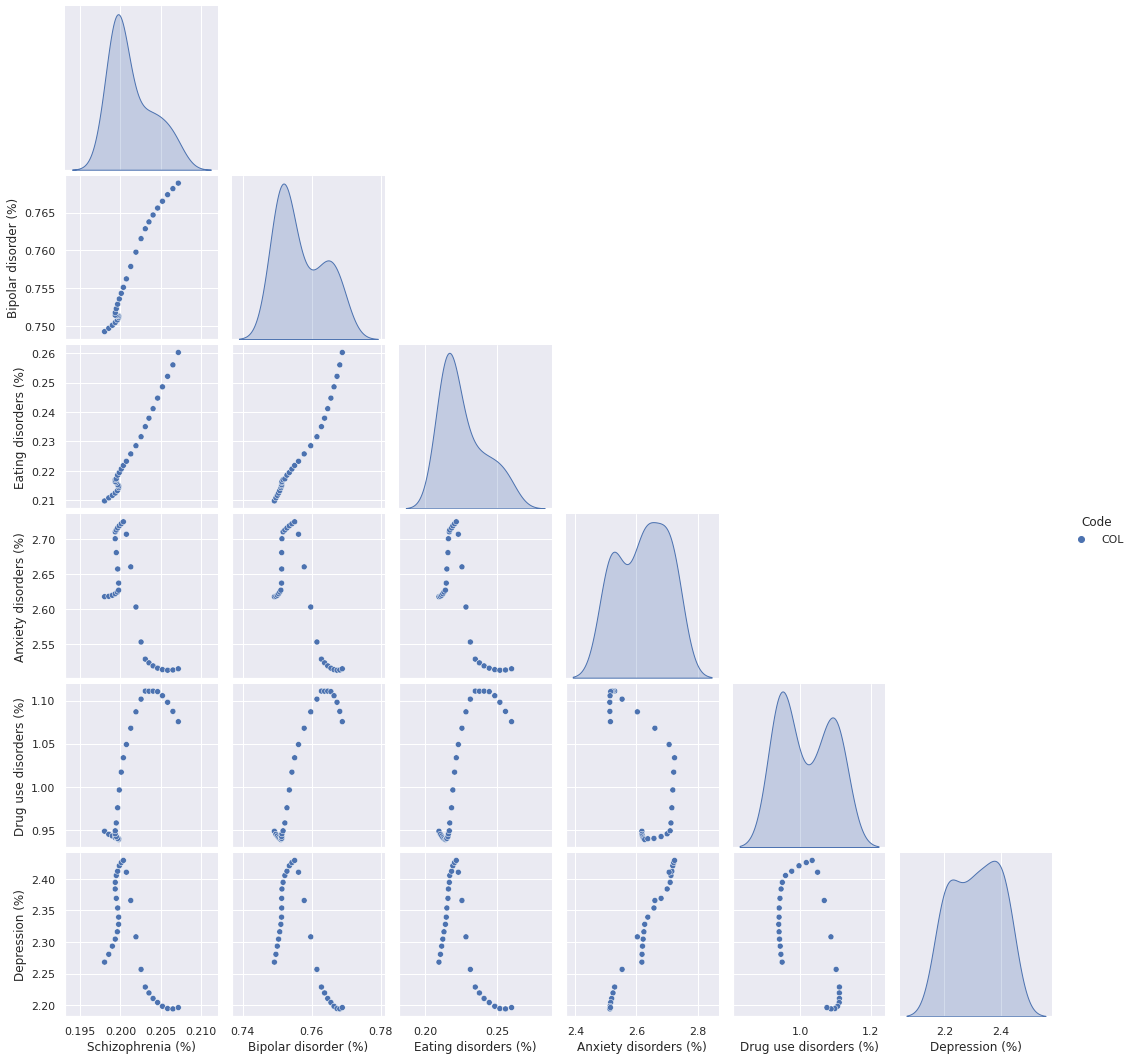

In [ ]:
# Se omite la variable "Year" y se incluye otro desorden mental
df_mhd_red = df_mhd.iloc[:,[1,3,4,5,6,7,8]]
df_mhd_red2 = df_mhd_red[(df_mhd_red['Code'] == "COL")]
#df_mhd_red.head
sns.pairplot(df_mhd_red2, 
             hue = "Code",
             corner = True)

En Colombia, los desordenes mentaes en general se caracterizan por presentar bimodalidad (salvedad para los desordenes alimenticios y esquizofrenia, los cuales presentan un sesgo hacia la izquierda). La depresión presenta una asociación frente a los desordenes de ansiedad, el desorden mental por consumo de drogas se asocia con transtornos de esquizofrenia, desordenes de bipolaridad y desordenes de alimentación, y en particular estos 3 últimos desórdenes presentan las mas evidentes asociaciones.

**Visualización 3**


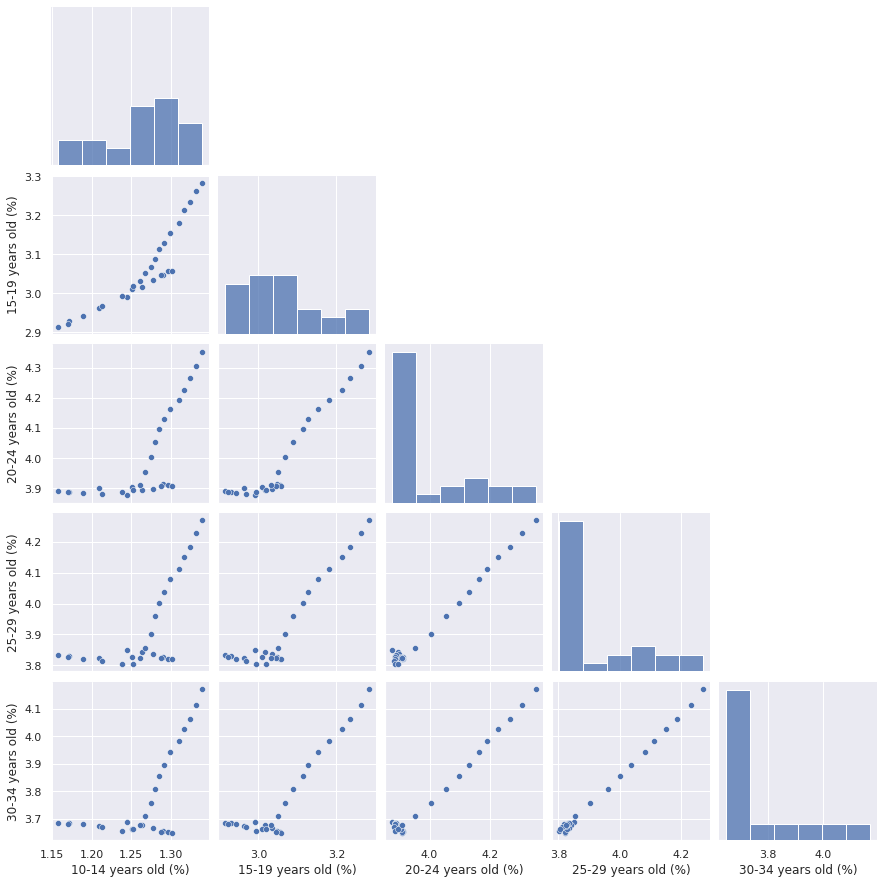

In [10]:

df_mh_edades = df_mh[df_mh["Code"]=="KOR"]
df_mh_edades2 = df_mh_edades.iloc[:,[1,4,8,3,9,7]]
sns.pairplot(df_mh_edades2,
             corner = True)



Mediante esta visualizacion se evidencia la prevalencia de tendencia en cuanto a las diferentes enfermedades registradas en un periodo de tiempo asi como las observaciones dadas en los respectivos rangos de edad.

## 3) Visualización temporal

**Prevalencia de la Depresión**

In [ ]:
# Opción 1. Gráfico de lineas -> subseteando 4 / 5 paises
df_mhd_countries = df_mhd[(df_mhd['Code'] == "COL") | 
                          (df_mhd['Code'] == "ALB") |
                          (df_mhd['Code'] == "ITA") |      # (df_mhd['Code'] == "NOR") |
                          (df_mhd['Code'] == "ESP") |      # (df_mhd['Code'] == "TUR") |
                          (df_mhd['Code'] == "USA")]

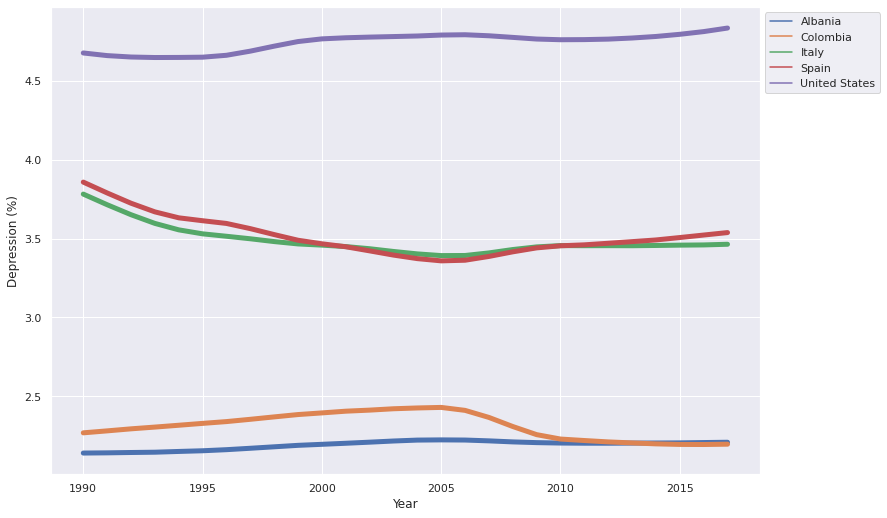

In [ ]:
sns.lineplot(data=df_mhd_countries,  x="Year", y="Depression (%)",
             hue = "Entity",
             # style="Entity",
             # markers=True,
             linewidth = 5)
plt.legend(loc = 2, bbox_to_anchor = (1,1))

Entre los 5 paises tomados en cuenta para el análisis inicial, los cuales son Albania, Colombia, Noruega, Turquía y Estados Unidos, se encuentra:
> *  país que presenta mayor prevalencia de depresión ha sido Estados Unidos, el cual ha presentado en todo el tiempo considerado una prevalencia de esta enfermedad superior al 4.5% de la población. Este problema ha ido en aumento según evidencia su línea de tendencia.
> * El comportamiento de la prevalencia de la depresión para España e Italia es muy similar a lo largo de los años. En ambos casos se encuentra sobre el 3.3%, desde 1990 hasta el 2004 fue disminuyendo gradualmente y desde el 2005 ha aumentado esta problemática gradualmente. Cabe resaltar que en general España presenta una prevalencia de depresión en su población superior a la de Italia, pero sus diferencias son muy leves.
> * Los países que presentan la menor prevalencia de depresión en la población son Albania y Colombia. Estos países presentan una prevalencia inferior al 2.5% en el periodo de análisis. En el caso de Colombia, desde eñ 1990 estuvo en aumento hasta el 2005, año desde el cual fue disminuyendo hasta el 2017. Albania es el país en el cual, en todos los años de análisis, ha presentado la menor prevalencia de depresión, con una muy leve tendencia creciente. Para los años 2010 a 2015 ha presentado niveles de prevalencia muy similares a los de Colombia.



In [ ]:
# Opción 2. Streamgraph
alt.Chart(df_mhd_countries).mark_area().encode(
    alt.X('Year:O'),
    alt.Y('Depression (%):Q'),
    alt.Color('Entity:N')
).properties(
    width=800,
    height=600
)

alt.Chart(...)

Evidentemente se observa que Estados Unidos, frente a los demás países, presenta la mayor prevalencia de depresión en los 28 años de análisis en comparación a Albania, Colombia, España e Italia. Se observan comportamientos muy similares (de hecho casi idénticos) en la prevalencia de la depresión en España e Italia, siendo estos el segundo y tercer país con mayor presencia de este problema (entre los países tomados para el análisis). Colombia es el cuarto país con mayor presencia de este problema, y finalmente Albania, país que presenta este probema en menor cuantía en comparación a los demás.

**Prevalencia de la Esquizofrenia**

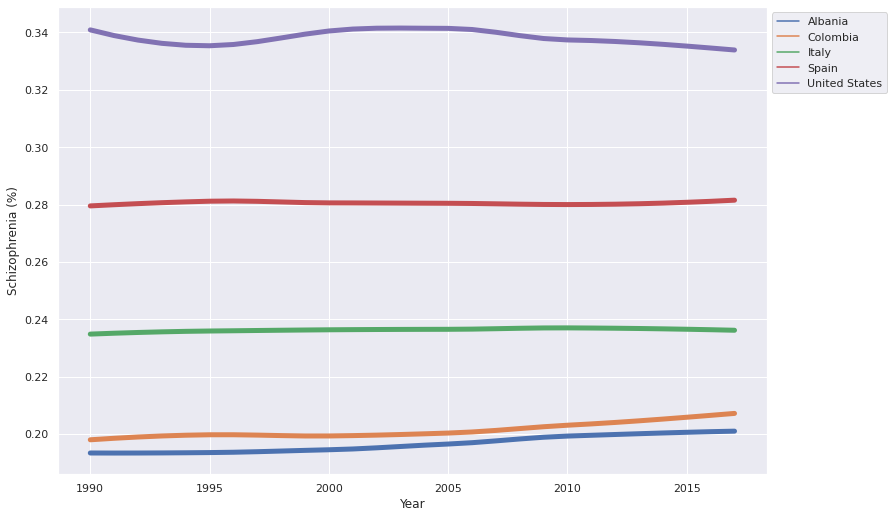

In [ ]:
df_mhd_countries2 = df_mhd[(df_mhd['Code'] == "COL") | 
                          (df_mhd['Code'] == "ALB") |
                          (df_mhd['Code'] == "ITA") |     
                          (df_mhd['Code'] == "ESP") |     
                          (df_mhd['Code'] == "USA")]

sns.lineplot(data=df_mhd_countries2,  x="Year", y="Schizophrenia (%)",
             hue = "Entity",
             # style="Entity",
             # markers=True,
             linewidth = 5)
plt.legend(loc = 2, bbox_to_anchor = (1,1))

Analizando la prevalencia de esquizofrenia en los diferentes paises, se determina que Estados Unidos presenta mayores indices en casos de este trastorno, asi mismo el grafico de lineas permite evidenciar que paises como Albania y Colombia contienen menores registros en este estudio.

In [ ]:
alt.Chart(df_mhd_countries2).mark_area().encode(
    alt.X('Year:O'),
    alt.Y('Schizophrenia (%):Q'),
    alt.Color('Entity:N')
).properties(
    width=800,
    height=600
)

alt.Chart(...)

En conjunto con el analisis anterior se corrobora efectivamente que los mayores casos de esquizofrenia se registran principalmente en Estados Unidos seguido de paises como España e Italia y asi mismo posicionandose Albania en ultimo lugar con menos casos de este trastorno presente en sus habitantes

## 4) Visualización espacial

**Prevalencia de la Depresión**

In [ ]:
import plotly.graph_objects as go
px.set_mapbox_access_token("pk.eyJ1IjoiampkaWFlc3AiLCJhIjoiY2wxdHAwcGd0MDl0dTNjcWZna29vMDlmciJ9.REDWJN58pxIys2biw8R0wQ")

fig = px.scatter_mapbox(df_mhd,
                        lat='Latitud',
                        lon='Longitud',
                        hover_name='Entity',
                        zoom=3,
                        color="Depression (%)",
                        color_continuous_scale = "solar",
                        mapbox_style = "mapbox://styles/mapbox/navigation-night-v1",
                        # mapbox_style = "mapbox://styles/mapbox/outdoors-v11",
                        size="Depression (%)",
                        animation_frame="Year", 
                        center = {"lat": 4.570868, "lon": -74.297333})
fig.update_layout(
        title_text = 'Prevalencia en la depresión a nivel mundial',
        showlegend = True,
        geo = dict(
            scope = 'south america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

La prevalencia de depresión se centra principalmente en países de Africa y Europa, asi como también en Norte América. Los mayores niveles de depresión se presentan en Groenlandia, Finlandia, Marruecos, Lesoto, Uganda, Palestina e Iran. Australia tambien presenta un alto grado de depresión en su población.

Sur América y Centro América en general presentan bajos niveles en cuanto a la prevalencia de depresión en su población se refuere. Colombia, por su parte, es uno de los países que presenta de los niveles mas bajos de ella.


**Prevalencia de la Esquizofrenia**



In [ ]:
fig = px.scatter_mapbox(df_mhd,
                        lat='Latitud',
                        lon='Longitud',
                        hover_name='Entity',
                        zoom=3,
                        color="Schizophrenia (%)",
                        color_continuous_scale = "Bluered",
                        #mapbox_style = "mapbox://styles/mapbox/navigation-night-v1",
                        mapbox_style = "mapbox://styles/mapbox/outdoors-v11",
                        size="Depression (%)",
                        animation_frame="Year", 
                        center = {"lat": 4.570868, "lon": -74.297333})
fig.update_layout(
        title_text = 'Prevalencia en la depresión a nivel mundial',
        showlegend = True,
        geo = dict(
            scope = 'south america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

Con miras generales en cuanto a los registros de los diferentes paises, se determina que los mayores casos del trastorno como esquizofrenia se presenta en Estados Unidos, Canada, China, Paises bajos